In [24]:
import math
import sqlite3 as sql
import dask.dataframe as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [25]:
COMPNAME = 5
NCD_FORMULA = "norm-inf-dist-1"

In [27]:
df = pd.read_csv("graphs.csv")
df = df[(df["compid"] == COMPNAME) & (df["ncd_formula"] == NCD_FORMULA) & (df["seqpart"] == 1)].compute()
df["weight"] = 1.0 / df["dist"]
df

,lbltype,compid,ncd_formula,dist_aggregator,seqpart,seqid_1,seqid_2,lbl,dist,weight
893009,0,5,norm-inf-dist-1,mp,1,90,91,1,1.397732,0.715444
893010,0,5,norm-inf-dist-1,mp,1,91,90,1,1.397732,0.715444
893011,0,5,norm-inf-dist-1,mp,1,90,190,1,1.370105,0.729871
893012,0,5,norm-inf-dist-1,mp,1,190,90,1,1.370105,0.729871
893013,0,5,norm-inf-dist-1,mp,1,90,191,1,1.296296,0.771429
...,...,...,...,...,...,...,...,...,...,...
1036696,0,5,norm-inf-dist-1,mp,1,49148,49051,1,1.677833,0.596007
1036697,0,5,norm-inf-dist-1,mp,1,49051,49149,1,1.156522,0.864662
1036698,0,5,norm-inf-dist-1,mp,1,49149,49051,1,1.156522,0.864662
1036743,0,5,norm-inf-dist-1,mp,1,49148,49149,1,0.921311,1.085409


In [28]:
lbls = pd.read_csv("labels.csv")
lbls = { row["seqid"] : row["lbl"] for index, row in lbls.iterrows() }

In [29]:
G = nx.from_pandas_edgelist(df, "seqid_1", "seqid_2", ["weight", "dist", "lbl"])

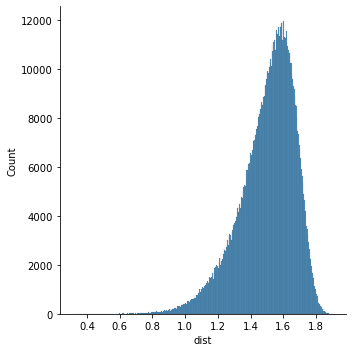

In [30]:
sns.displot(df["dist"])

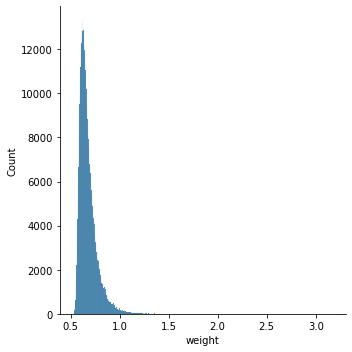

In [31]:
sns.displot(df["weight"])

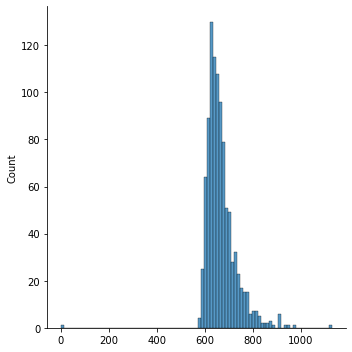

In [32]:
sns.displot(nx.laplacian_spectrum(G))

In [33]:
node_colours = [('blue' if lbls[node] == 0 else 'red') for node in G.nodes()]
edge_opacities = list(nx.get_edge_attributes(G, "weight").values())
edge_opacities = [0.0 if a < 1.0 else 0.2 * (a - 1.0) / 3.0 for a in edge_opacities]

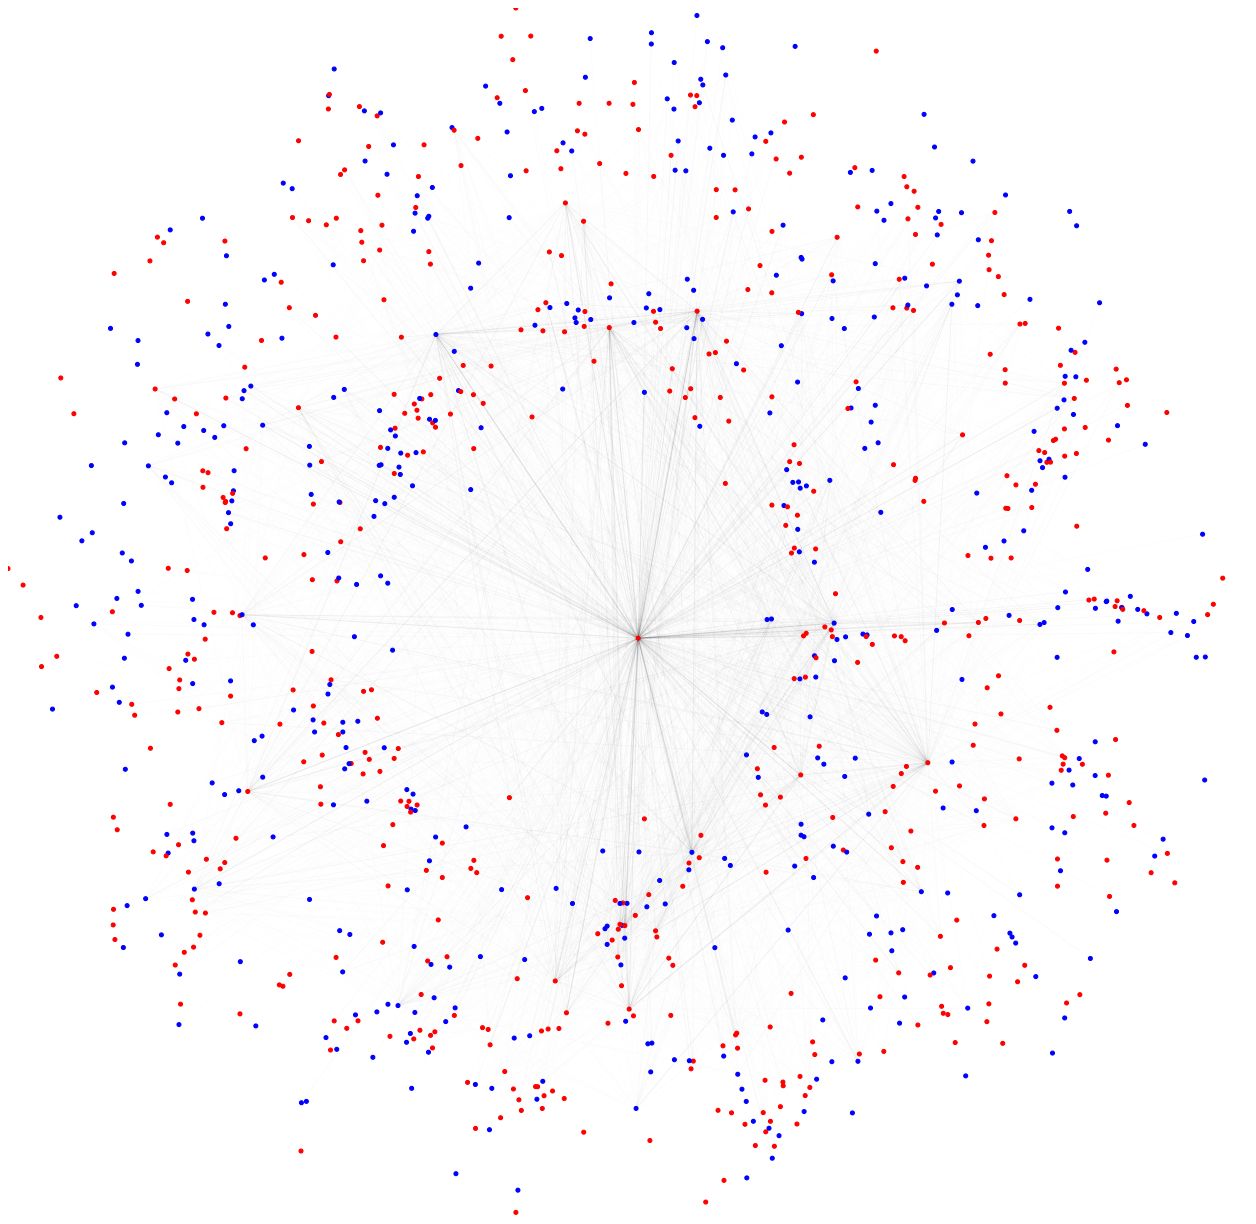

In [34]:
plt.figure(num=None, figsize=(20, 20), dpi=80)
plt.axis('off')
fig = plt.figure(1)
pos = nx.spring_layout(G, weight="weight")
nx.draw_networkx_nodes(G, pos, node_shape='.', node_size=50, node_color=node_colours)
nx.draw_networkx_edges(G, pos, alpha=edge_opacities)
xmax = max(abs(xx) for xx, yy in pos.values())
ymax = max(abs(yy) for xx, yy in pos.values())
plt.xlim(-xmax, xmax)
plt.ylim(-ymax, ymax)
plt.show()

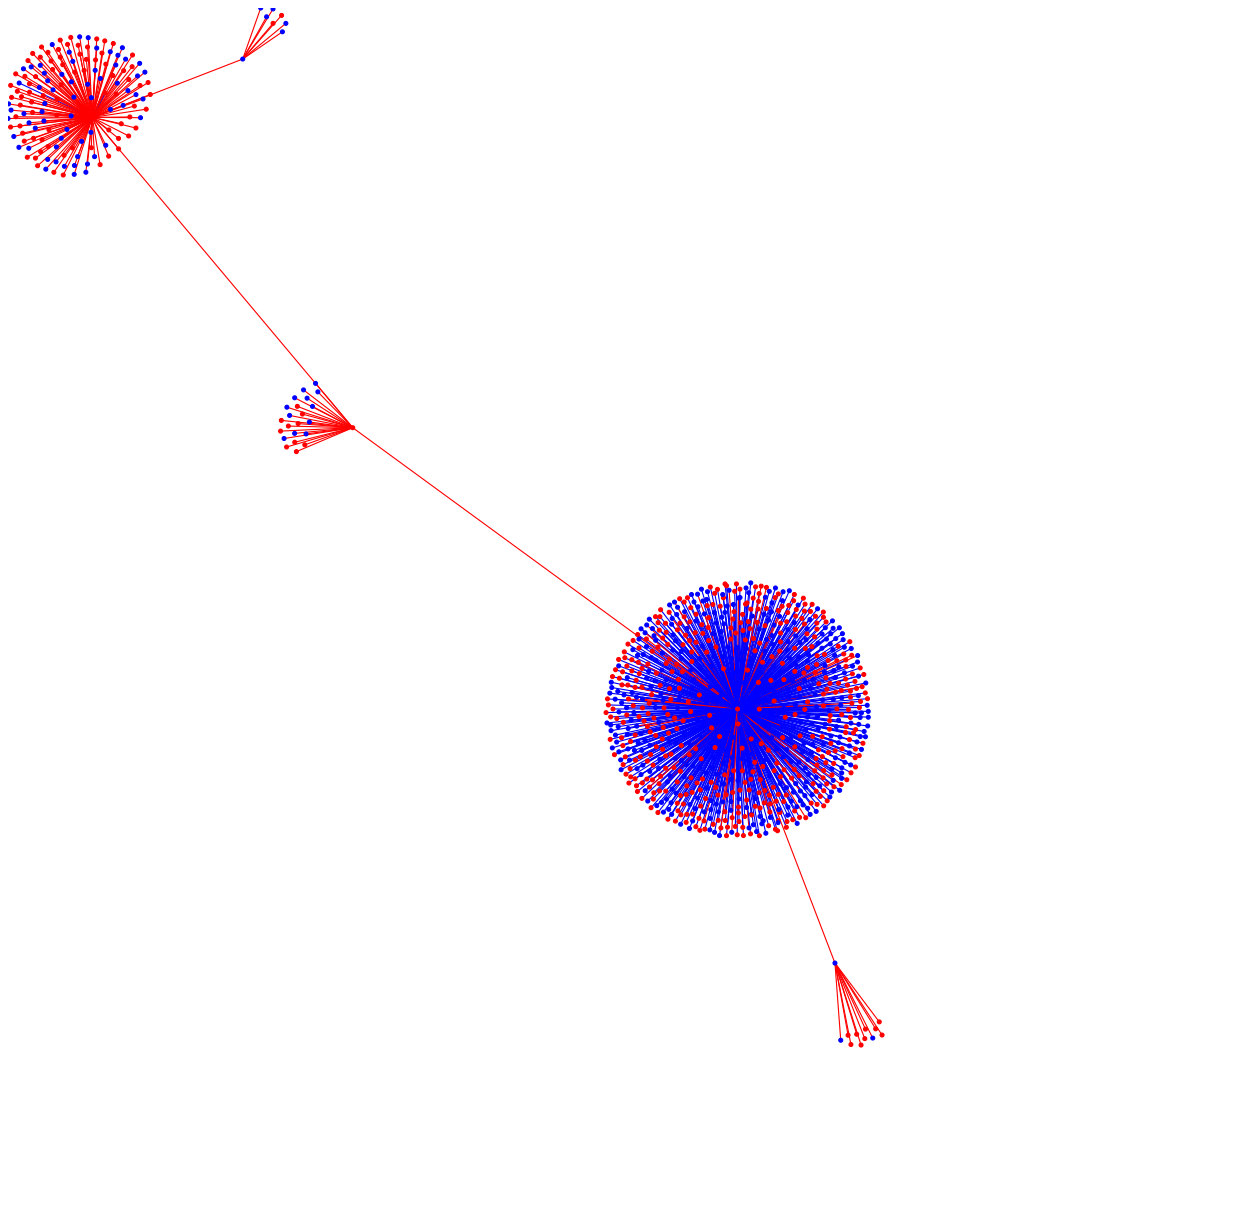

In [35]:
G_mst = nx.minimum_spanning_tree(G, weight="dist")

plt.figure(num=None, figsize=(20, 20), dpi=80)
plt.axis('off')
fig = plt.figure(1)
pos = nx.spring_layout(G_mst, weight=None)
nx.draw_networkx_nodes(G_mst, pos, node_shape='.', node_size=50, node_color=node_colours)
nx.draw_networkx_edges(
    G_mst, pos,
    edge_color=[('blue' if lbl == 0 else 'red') for lbl in nx.get_edge_attributes(G_mst, "lbl").values()]
)
xmax = max(abs(xx) for xx, yy in pos.values())
ymax = max(abs(yy) for xx, yy in pos.values())
plt.xlim(-xmax, xmax)
plt.ylim(-ymax, ymax)
plt.show()